In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from xgboost import XGBClassifier

## Dataset 1

In [2]:
df1 = pd.read_csv('./datasets/dataset_1.csv', index_col=0)

In [3]:
# Split dataset
X = df1.drop('labels', axis=1)
y = df1['labels']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [25]:
X_train.head()

,var1,var2
63,0.752217,0.149697
457,-0.280135,-0.161766
95,0.709969,0.438364
488,-0.393032,-1.016498
146,0.752826,0.394329


In [4]:
df1.head()

,var1,var2,labels
0,0.336956,0.639096,class_1
1,0.434911,0.828885,class_1
2,0.550938,0.408508,class_1
3,0.086163,1.046761,class_1
4,0.689772,0.404202,class_1


In [5]:
df1.describe()

,var1,var2
count,500.000000,500.000000
mean,0.125813,0.135211
std,0.483135,0.485897
min,-1.102830,-1.016498
25%,-0.244530,-0.241561
50%,0.084797,0.160035
75%,0.517539,0.495548
max,1.397078,1.533363


In [6]:
# Check NaNs
df1.isna().sum()

var1      0
var2      0
labels    0
dtype: int64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12200\269102283.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df1['var1'], df1['var2'], c=color, cmap='viridis')


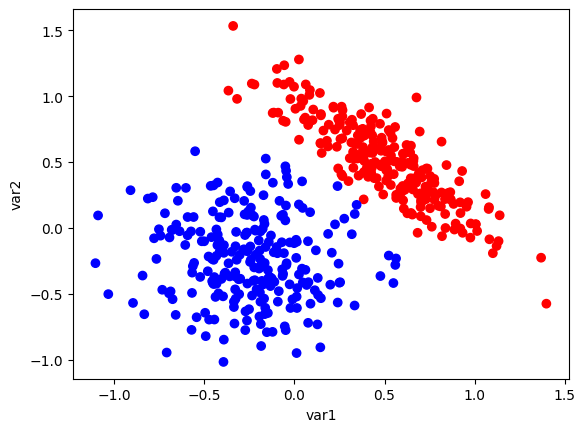

In [7]:
color = df1['labels'].map({'class_1': 'red', 'class_2': 'blue'})
plt.scatter(df1['var1'], df1['var2'], c=color, cmap='viridis')

plt.xlabel('var1')
plt.ylabel('var2')

plt.show()

Se puede observar que los valores pertenecientes a la clase 1 tienen una distribución diferente a los de la clase 2, pudiendo ser facilmente distinguibles mediante un modelo lineal. Los valores de la clase 1 se comportan como una distribución normal con  media en (0.12, 0,13), mientras que los valores de la clase 2 responden a una distribucion lineal con cierto grado de dispersion.

Dataset 1 Naive Bayes Training

In [8]:
model_nb = GaussianNB()

model_nb.fit(X_train, y_train)

GaussianNB()

In [9]:
def metrics_calculator(clf, X_test, y_test, model_name):
    '''
    This function calculates all desired performance metrics for a given model on test data.
    '''
    y_pred = clf.predict(X_test)
    result = pd.DataFrame(data=[accuracy_score(y_test, y_pred),
                                precision_score(y_test, y_pred, average='macro'),
                                recall_score(y_test, y_pred, average='macro'),
                                f1_score(y_test, y_pred, average='macro'),
                                roc_auc_score(y_test, clf.predict_proba(X_test)[::,1], average='macro')],
                          index=['Accuracy','Macro Precision','Macro Recall','Macro F1-score','Macro AUC'],
                          columns = [model_name])
    
    result = (result * 100).round(2).astype(str) + '%'                            
    return result

In [10]:
def model_evaluation(clf, X_train, X_test, y_train, y_test, model_name):
    '''
    This function provides a complete report of the model's performance 
    including classification reports and confusion matrix
    '''
    # Set font scale
    sns.set(font_scale=1.5)
    
    # Generate classification report for training set
    y_pred_train = clf.predict(X_train)
    print("\n\t  Classification report for training set")
    print("-"*55)
    print(classification_report(y_train, y_pred_train))

    # Generate classification report for test set
    y_pred_test = clf.predict(X_test)
    print("\n\t   Classification report for test set")
    print("-"*55)
    print(classification_report(y_test, y_pred_test))
    print('\n')
    
    # Create figure and subplots 
    fig, (ax1, ax2) = plt.subplots(1, 2, dpi=90, figsize=(12, 5))
    
    # Plot confusion matrix for test set
    ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, colorbar=False, cmap='Blues', ax=ax1)
    ax1.set_title('Confusion Matrix for Test Data')                                     
    ax1.grid(False)
            
    # Report desired results as a summary in the form of a table
    result = metrics_calculator(clf, X_test, y_test, model_name)
    table = ax2.table(cellText=result.values, colLabels=result.columns, rowLabels=result.index, loc='center')
    table.scale(0.6, 3.6)
    table.set_fontsize(12)
    ax2.axis('tight')
    # Hide the axes
    ax2.axis('off')
    # set the title
    ax2.set_title('{} Performance Summary on Test Data'.format(model_name), fontsize=18)
    # Modify color 
    for key, cell in table.get_celld().items():
        if key[0] == 0:
            cell.set_color('purple')
              
    plt.tight_layout()
    plt.show() 


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

     class_1       0.94      1.00      0.97       200
     class_2       1.00      0.94      0.97       200

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

     class_1       0.94      1.00      0.97        50
     class_2       1.00      0.94      0.97        50

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100





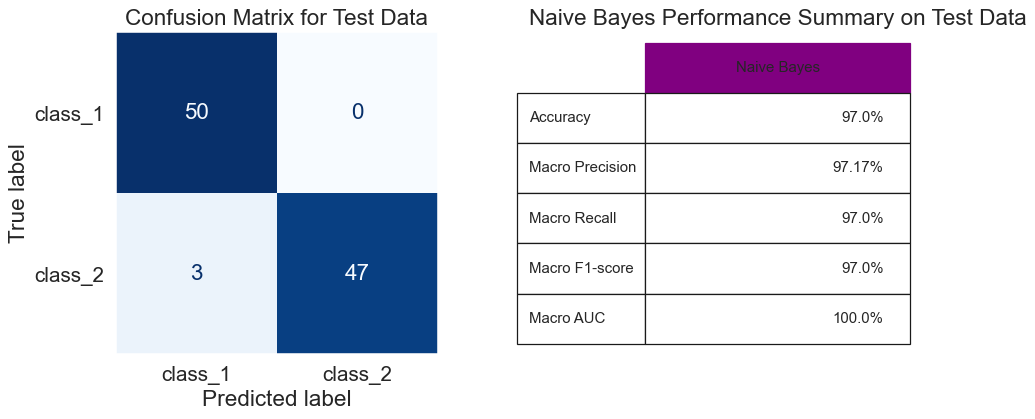

In [11]:
model_evaluation(model_nb, X_train, X_test, y_train, y_test, 'Naive Bayes')

Dataset 1 Logistic Regression Training

In [12]:
model_lr = LogisticRegression()

model_lr.fit(X_train, y_train)

LogisticRegression()


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

     class_1       0.98      1.00      0.99       200
     class_2       1.00      0.97      0.99       200

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

     class_1       1.00      1.00      1.00        50
     class_2       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100





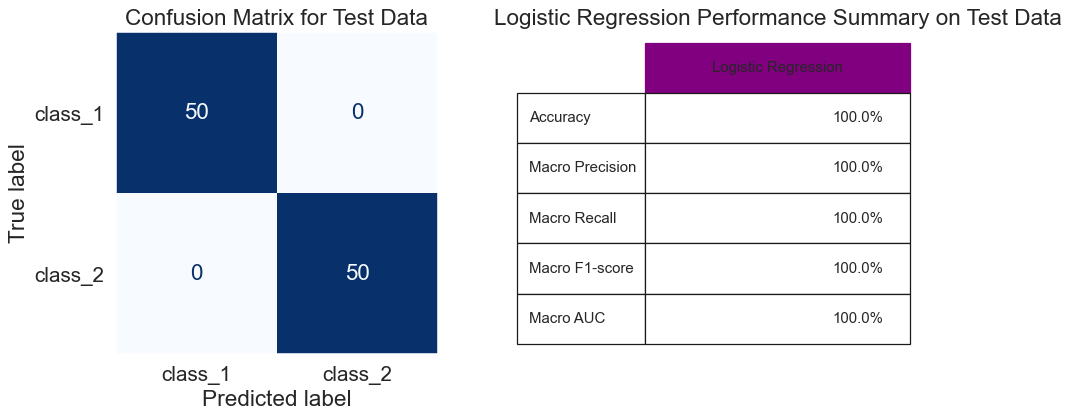

In [13]:
model_evaluation(model_lr, X_train, X_test, y_train, y_test, 'Logistic Regression')

Si bien ambos modelos tienen un buen desempeño, el modelo de regresión logística clasifica mejor. Según diversos estudios generalmente la regresión logística tiende a desempeñarse mucho mejor, pero tiene un tiempo de convergencia mayor (se suele requerir más datos)

## Dataset 2

In [14]:
df2 = pd.read_csv('datasets/dataset_2.csv', index_col=0)

In [15]:
X2 = df2.drop('labels', axis=1)
y2 = df2['labels']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, shuffle=True)

In [16]:
df2.head()

,var1,var2,labels
0,-0.250920,0.901429,class_1
1,0.463988,0.197317,class_2
2,-0.687963,-0.688011,class_1
3,-0.883833,0.732352,class_1
4,0.202230,0.416145,class_2


In [17]:
df2.describe()

,var1,var2
count,500.000000,500.000000
mean,-0.065067,0.026093
std,0.593517,0.571850
min,-0.989877,-0.990736
25%,-0.632278,-0.466773
50%,-0.085677,0.046163
75%,0.438587,0.517524
max,0.993274,0.999435


In [18]:
df2.isna().sum()

var1      0
var2      0
labels    0
dtype: int64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12200\2167537570.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df2['var1'], df2['var2'], c=color, cmap='viridis')


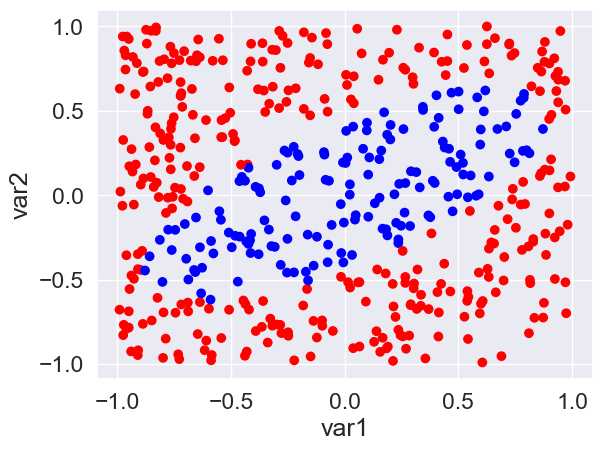

In [19]:
color = df2['labels'].map({'class_1': 'red', 'class_2': 'blue'})
plt.scatter(df2['var1'], df2['var2'], c=color, cmap='viridis')

plt.xlabel('var1')
plt.ylabel('var2')

plt.show()

A simple vista podemos notar que la distribución compleja de ambas clases dificultaría el uso de un modelo de clasificación lineal, esperando bajos resultados del modelo de regresión logística.

Dataset 2 Naive Bayes

In [20]:
model2_nb = GaussianNB()

model2_nb.fit(X2_train, y2_train)

GaussianNB()


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

     class_1       0.79      0.99      0.88       275
     class_2       0.96      0.42      0.59       125

    accuracy                           0.81       400
   macro avg       0.88      0.71      0.73       400
weighted avg       0.85      0.81      0.79       400


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

     class_1       0.73      1.00      0.85        66
     class_2       1.00      0.29      0.45        34

    accuracy                           0.76       100
   macro avg       0.87      0.65      0.65       100
weighted avg       0.82      0.76      0.71       100





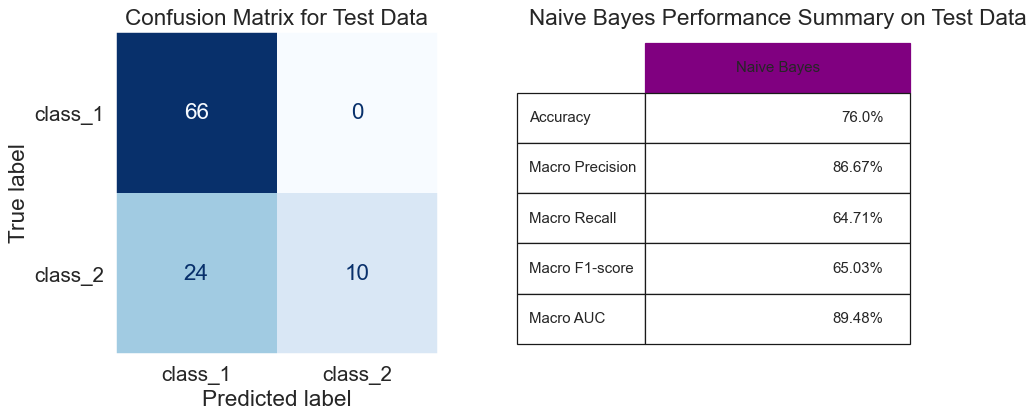

In [21]:
model_evaluation(model2_nb, X2_train, X2_test, y2_train, y2_test, 'Naive Bayes')

Dataset 2 Logistic Regression

In [22]:
model2_lr = LogisticRegression()

model2_lr.fit(X2_train, y2_train)

LogisticRegression()

In [23]:
model2_lr.predict(X2_test)

array(['class_1', 'class_1', 'class_1', 'class_1', 'class_1', 'class_1',
       'class_1', 'class_1', 'class_1', 'class_1', 'class_1', 'class_1',
       'class_1', 'class_1', 'class_1', 'class_1', 'class_1', 'class_1',
       'class_1', 'class_1', 'class_1', 'class_1', 'class_1', 'class_1',
       'class_1', 'class_1', 'class_1', 'class_1', 'class_1', 'class_1',
       'class_1', 'class_1', 'class_1', 'class_1', 'class_1', 'class_1',
       'class_1', 'class_1', 'class_1', 'class_1', 'class_1', 'class_1',
       'class_1', 'class_1', 'class_1', 'class_1', 'class_1', 'class_1',
       'class_1', 'class_1', 'class_1', 'class_1', 'class_1', 'class_1',
       'class_1', 'class_1', 'class_1', 'class_1', 'class_1', 'class_1',
       'class_1', 'class_1', 'class_1', 'class_1', 'class_1', 'class_1',
       'class_1', 'class_1', 'class_1', 'class_1', 'class_1', 'class_1',
       'class_1', 'class_1', 'class_1', 'class_1', 'class_1', 'class_1',
       'class_1', 'class_1', 'class_1', 'class_1', 


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

     class_1       0.69      1.00      0.81       275
     class_2       0.00      0.00      0.00       125

    accuracy                           0.69       400
   macro avg       0.34      0.50      0.41       400
weighted avg       0.47      0.69      0.56       400


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

     class_1       0.66      1.00      0.80        66
     class_2       0.00      0.00      0.00        34

    accuracy                           0.66       100
   macro avg       0.33      0.50      0.40       100
weighted avg       0.44      0.66      0.52       100





c:\Users\Lenovo\.conda\envs\zoom\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Lenovo\.conda\envs\zoom\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Lenovo\.conda\envs\zoom\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Lenovo\

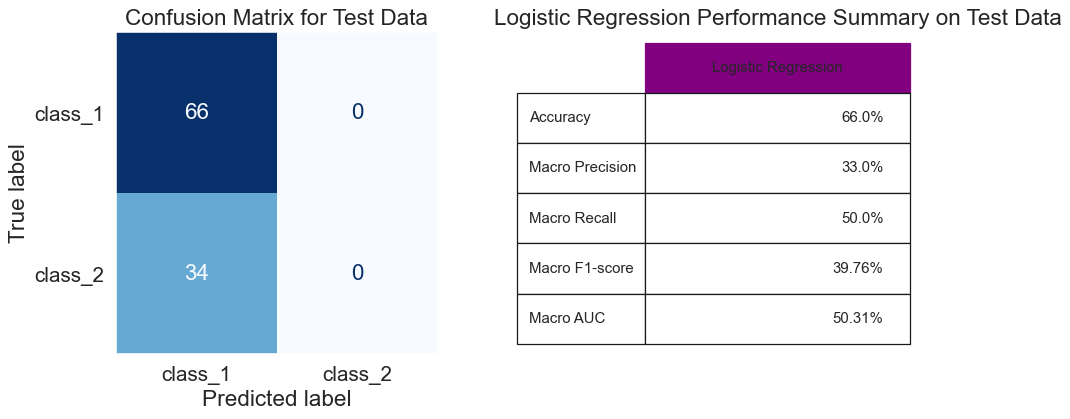

In [24]:
model_evaluation(model2_lr, X2_train, X2_test, y2_train, y2_test, 'Logistic Regression')

Como se esperaba, ambos modelos tienen un bajo accuracy debido a la naturaleza no lineal de los datos, desenpeñandose particularmente mal el de regresión logística. Esto se deba probablemente a que el mismo requiera entrenarse con más datos para tener un mejor performance.

Modelo propuesto para Dataset 2: XGBoost

In [30]:
xgb = XGBClassifier()

label_encoding_dict = {'class_1': 0, 'class_2': 1}
label_decoding_dict = {0: 'class_1', 1: 'class_2'}

y2_train_encoded = y2_train.map(label_encoding_dict)
xgb.fit(X2_train, y2_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       275
           1       1.00      1.00      1.00       125

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.98      0.96        66
           1       0.97      0.85      0.91        34

    accuracy                           0.94       100
   macro avg       0.95      0.92      0.93       100
weighted avg       0.94      0.94      0.94       100





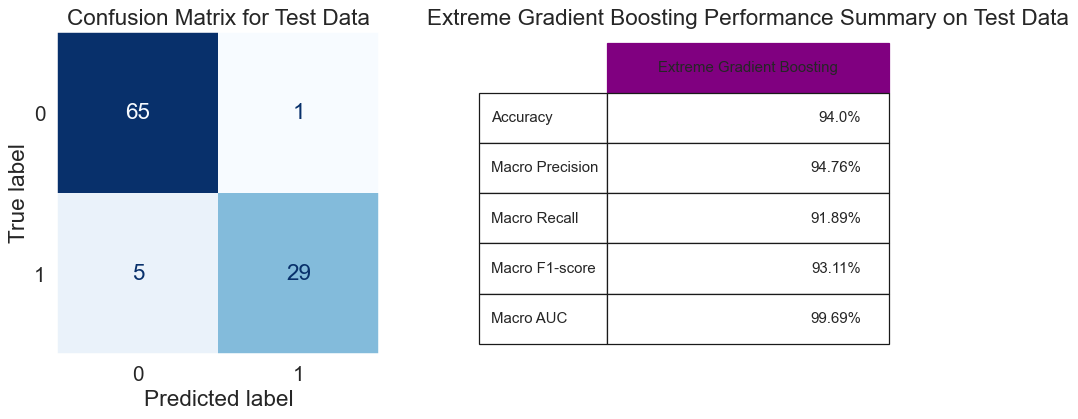

In [34]:
y2_test_encoded = y2_test.map(label_encoding_dict)
model_evaluation(xgb, X2_train, X2_test, y2_train_encoded, y2_test_encoded, 'Extreme Gradient Boosting')

El modelo XGBoost es ampliamente usado para tareas que involucran datasets tabulados, el mismo consiste en un ensemble de random forests. Podemos observar su buen desempeño comparado con los dos modelos anteriores.